In [25]:
!git clone https://github.com/iamavieira/handwritten-digits-mnist mnist

Cloning into 'mnist'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 96 (delta 16), reused 12 (delta 3), pack-reused 64
Receiving objects: 100% (96/96), 22.40 MiB | 15.28 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [107]:
!gzip -d /content/mnist/data/test/gzfiles/t10k-images-idx3-ubyte.gz
!gzip -d /content/mnist/data/test/gzfiles/t10k-labels-idx1-ubyte.gz

In [40]:
!pip install python-mnist

In [46]:
from mnist import MNIST

In [108]:
mnist_training = MNIST('/content/mnist/data/train')
mnist_test = MNIST('/content/mnist/data/test/gzfiles')

In [109]:
train_images, train_labels = mnist_training.load_training()
test_images, test_labels = mnist_test.load_testing()

In [110]:
del mnist_training, mnist_test

In [111]:
print(len(train_images), len(train_labels))
print(len(test_images), len(test_labels))

60000 60000
10000 10000


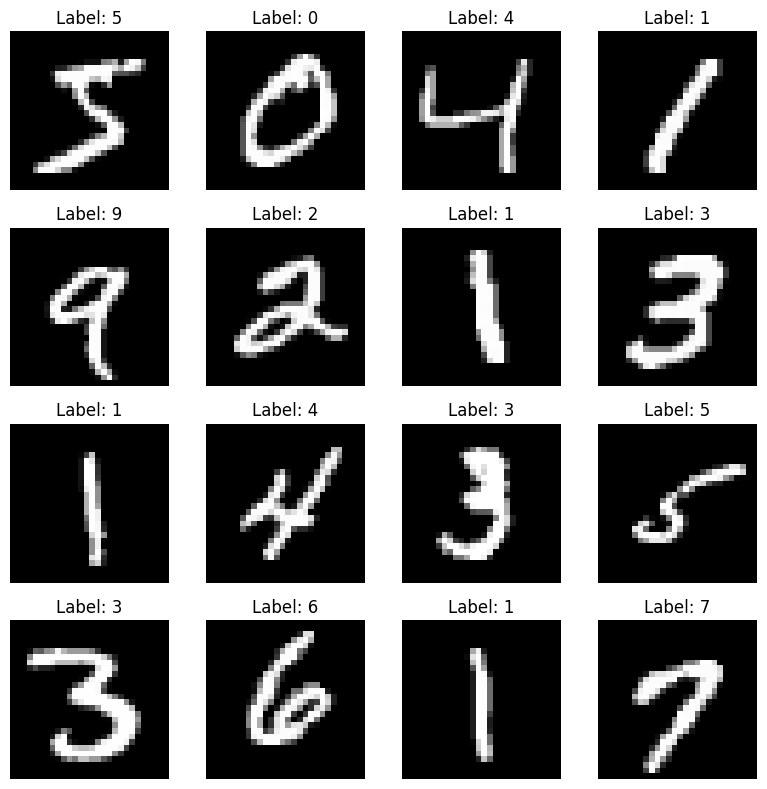

In [127]:
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    image = np.array(train_images[i], dtype='float').reshape((28, 28))
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {train_labels[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [114]:
from sklearn.preprocessing import LabelBinarizer

In [115]:
lb = LabelBinarizer()
lb.fit(train_labels)

LabelBinarizer()

In [117]:
one_hot_train_labels = lb.transform(train_labels)
one_hot_test_labels = lb.transform(test_labels)

In [118]:
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

(60000, 10)
(10000, 10)


In [119]:
def prepare_images(image_list):
  training_images = []
  for i in image_list:
      image = np.array(i, dtype='float').reshape((28, 28))
      image = image.flatten()  # Flatten the image
      training_images.append(image/255)

  image_array = np.vstack(training_images)
  return image_array

def prepare_label(one_hot_labels):
  labels = np.argmax(one_hot_labels, axis=1)
  return labels

In [120]:
X_train = prepare_images(train_images)
X_test = prepare_images(test_images)

In [122]:
y_train = prepare_label(one_hot_train_labels)
y_test = prepare_label(one_hot_test_labels)

In [123]:
from sklearn.linear_model import LogisticRegression

In [128]:
lr = LogisticRegression(penalty="l1", solver="saga")

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred, target_names= ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]))